<a href="https://colab.research.google.com/github/DoyulPark/pdm08/blob/master/py-tensorflow/tf2_1_datasets_cv_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CV (Computer vision) datasets-2 in AI
> https://www.tensorflow.org/api_docs/python/tf/keras/datasets  
- from keras
    - CIFAR-10
    - CIFAR-100
    -  ...



In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

print(tf.__version__)

2.3.0


## CIFAR-10 Dataset (CIFAR: Canadian Institute For Advanced Research)
> https://www.cs.toronto.edu/~kriz/cifar.html  
- (50000, 32, 32, 3), train
- (10000, 32, 32, 3), test
- color photographs of objects from 10 classes, such as frogs, birds, cats, ships, etc

### class names
- class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [3]:
from keras.datasets import cifar10
# load dataset
(trainX, trainy), (testX, testy) = cifar10.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))


Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


###데이터 구조 확인

- cifar-10: X=(50000, 32, 32, 3), y=(50000, 1)
- mnist: X=(10000, 32, 32, 3), y=(10000, 1)



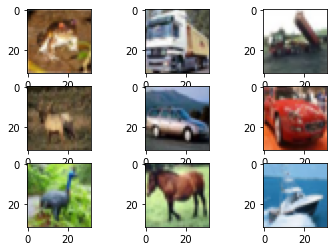

In [7]:
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(trainX[i])
# show the figure
# plt.show()

## CIFAR-10 trainset

In [8]:
type(trainy), trainy.shape

(numpy.ndarray, (50000, 1))

In [9]:
trainy[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [10]:
# Frequencies of each kind of image
unique, counts = np.unique(trainy, return_counts=True)
cifar10_train_dic = dict(zip(unique, counts))
cifar10_train_dic

{0: 5000,
 1: 5000,
 2: 5000,
 3: 5000,
 4: 5000,
 5: 5000,
 6: 5000,
 7: 5000,
 8: 5000,
 9: 5000}

<BarContainer object of 10 artists>

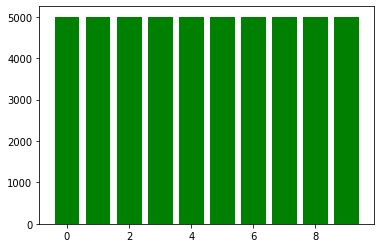

In [11]:
plt.bar(list(cifar10_train_dic.keys()), cifar10_train_dic.values(), color='g')

#### 트레인데이터에서 무작위로 한 종류를 선택해서 출력

7077


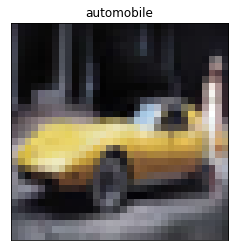

In [14]:
# display one random image from our training set:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

idx = np.random.randint(0, trainX.shape[0])
print(idx)
image = trainX[idx]
plt.imshow(image)
plt.title(class_names[trainy[idx].item()])
plt.xticks([])
plt.yticks([])

plt.show()

In [15]:
idx, trainy[idx].item()

(7077, 1)

#### 대표 패션 그림 출력

In [18]:
trainy[:5],trainy[5] ,trainy[5].item()

(array([[6],
        [9],
        [9],
        [4],
        [1]], dtype=uint8), array([1], dtype=uint8), 1)

In [23]:
num0_9 = trainX[trainy == 0] #trainy는 이차열배열이기에 (1차원값에) 안된다

IndexError: ignored

In [24]:
num0_9 = trainX[trainy[:,0] == 1]
num0_9.shape, num0_9[0], num0_9[0].shape

((5000, 32, 32, 3), array([[[170, 180, 198],
         [168, 178, 196],
         [177, 185, 203],
         ...,
         [162, 179, 215],
         [158, 178, 214],
         [157, 177, 212]],
 
        [[168, 181, 198],
         [172, 185, 201],
         [171, 183, 200],
         ...,
         [159, 177, 212],
         [156, 176, 211],
         [154, 174, 209]],
 
        [[154, 170, 186],
         [149, 165, 181],
         [129, 144, 162],
         ...,
         [161, 178, 214],
         [157, 177, 212],
         [154, 174, 209]],
 
        ...,
 
        [[ 74,  84,  80],
         [ 76,  85,  81],
         [ 78,  85,  82],
         ...,
         [ 71,  75,  78],
         [ 68,  72,  75],
         [ 61,  65,  68]],
 
        [[ 68,  76,  77],
         [ 69,  77,  78],
         [ 72,  79,  78],
         ...,
         [ 76,  80,  83],
         [ 71,  75,  78],
         [ 71,  75,  78]],
 
        [[ 67,  75,  78],
         [ 68,  76,  79],
         [ 69,  75,  76],
         ...,
         

(5000, 32, 32, 3)
(5000, 32, 32, 3)
(5000, 32, 32, 3)
(5000, 32, 32, 3)
(5000, 32, 32, 3)
(5000, 32, 32, 3)
(5000, 32, 32, 3)
(5000, 32, 32, 3)
(5000, 32, 32, 3)
(5000, 32, 32, 3)


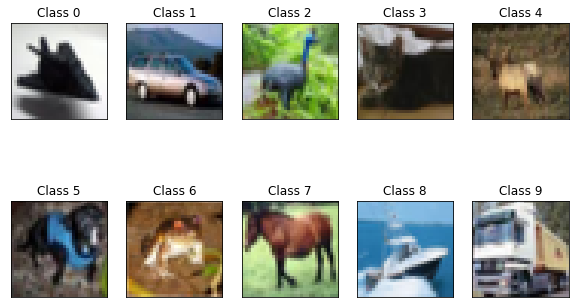

In [22]:
fig = plt.figure(figsize=(10,6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    num0_9 = trainX[trainy[:,0] == i]
    print(num0_9.shape)
    plt.imshow(num0_9[0]) #, cmap='gray') #, interpolation='none')
    plt.title("Class %d" % (i))
    plt.xticks([])
    plt.yticks([])



### [DIY]cifar-10 trainset에서 각 유형이 출현하는 첫 인덱스를 이용해서 대표유형들을 출력하시오.

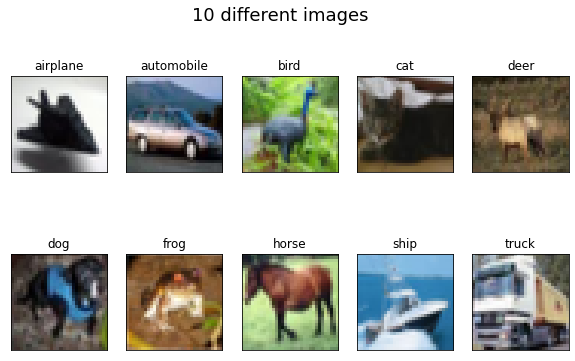

In [25]:
# Your code here!
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_10 = np.unique(trainy, return_index=True)[1]
images = trainX[num_10]
fig = plt.figure(figsize=(10,6))
for i in range(len(images)):
    # define subplot
    plt.subplot(2,5,1 + i) #, sharey=False)
    # plot raw pixel data
    plt.imshow(images[i])
    plt.title(class_names[i])
    plt.xticks([])
    plt.yticks([])
plt.suptitle("10 different images", fontsize=18)
plt.show()

### CIFAR-10 test set

In [26]:
# import numpy as np
print(type(testy))
unique, counts = np.unique(testy, return_counts=True)
cifar10_test_dic = dict(zip(unique, counts))
cifar10_test_dic


<class 'numpy.ndarray'>


{0: 1000,
 1: 1000,
 2: 1000,
 3: 1000,
 4: 1000,
 5: 1000,
 6: 1000,
 7: 1000,
 8: 1000,
 9: 1000}

<BarContainer object of 10 artists>

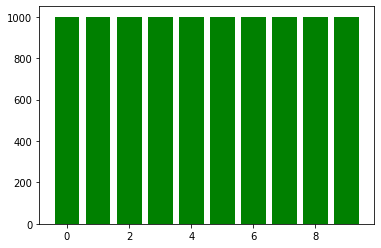

In [27]:
plt.bar(list(cifar10_test_dic.keys()), cifar10_test_dic.values(), color='g')

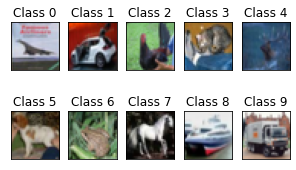

In [28]:
fig = plt.figure(figsize=(5,3))
for i in range(10):
    plt.subplot(2, 5, i+1)
    num0_9 = testX[testy[:,0] == i]
    plt.imshow(num0_9[0]) #, cmap='gray') #, interpolation='none')
    plt.title("Class %d" % (i))
    plt.xticks([])
    plt.yticks([])



### [DIY]cifar-10 testset에서 각 유형이 출현하는 첫 인덱스를 이용해서 대표유형들을 출력하시오.

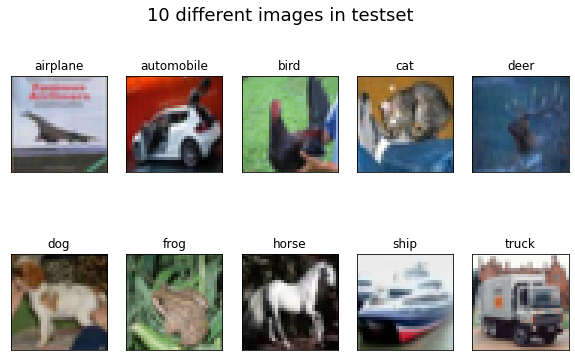

In [29]:
# Your code here!
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_10 = np.unique(testy, return_index=True)[1]
images = testX[num_10]
fig = plt.figure(figsize=(10,6))
for i in range(len(images)):
    # define subplot
    plt.subplot(2,5,1 + i) #, sharey=False)
    # plot raw pixel data
    plt.imshow(images[i])
    plt.title(class_names[i])
    plt.xticks([])
    plt.yticks([])
plt.suptitle("10 different images in testset", fontsize=18)
plt.show()




---



---



## CIFAR-100 Dataset (CIFAR: Canadian Institute For Advanced Research)
> https://www.cs.toronto.edu/~kriz/cifar.html  
- (50000, 32, 32, 3), train
- (10000, 32, 32, 3), test
- color photographs of objects from 100 classes, such as fish, flowers, insects, and much more.  

> The 100 classes in the CIFAR-100 are grouped into 20 superclasses. Each image comes with a "fine" label (the class to which it belongs) and a "coarse" label (the superclass to which it belongs).

### class names
- class_names = ['beaver', 'dolphin', 'otter', 'seal', 'whale', 'aquarium fish', 'flatfish', 'ray', 'shark', 'trout', 
'orchids', 'poppies', 'roses', 'sunflowers', 'tulips', 
'bottles', 'bowls', 'cans', 'cups', 'plates', 
'apples', 'mushrooms', 'oranges', 'pears', 'sweet peppers', 
'clock', 'keyboard', 'lamp', 'telephone', 'television', 
'bed', 'chair', 'couch', 'table', 'wardrobe', 
'bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach', 
'bear', 'leopard', 'lion', 'tiger', 'wolf', 
'bridge', 'castle', 'house', 'road', 'skyscraper', 
'cloud', 'forest', 'mountain', 'plain', 'sea', 
'camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo', 
'fox', 'porcupine', 'possum', 'raccoon', 'skunk', 
'crab', 'lobster', 'snail', 'spider', 'worm', 
'baby', 'boy', 'girl', 'man', 'woman', 
'crocodile', 'dinosaur', 'lizard', 'snake', 'turtle', 
'hamster', 'mouse', 'rabbit', 'shrew', 'squirrel', 
'maple', 'oak', 'palm', 'pine', 'willow', 
'bicycle', 'bus', 'motorcycle', 'pickup truck', 'train', 
'lawn-mower', 'rocket', 'streetcar', 'tank', 'tractor']

### cifar-100: Superclass(20), Classes(100)
```
Superclass	Classes
aquatic mammals	beaver, dolphin, otter, seal, whale
fish	aquarium fish, flatfish, ray, shark, trout
flowers	orchids, poppies, roses, sunflowers, tulips
food containers	bottles, bowls, cans, cups, plates
fruit and vegetables	apples, mushrooms, oranges, pears, sweet peppers
household electrical devices	clock, keyboard, lamp, telephone, television
household furniture	bed, chair, couch, table, wardrobe
insects	bee, beetle, butterfly, caterpillar, cockroach
large carnivores	bear, leopard, lion, tiger, wolf
large man-made outdoor things	bridge, castle, house, road, skyscraper
large natural outdoor scenes	cloud, forest, mountain, plain, sea
large omnivores and herbivores	camel, cattle, chimpanzee, elephant, kangaroo
medium-sized mammals	fox, porcupine, possum, raccoon, skunk
non-insect invertebrates	crab, lobster, snail, spider, worm
people	baby, boy, girl, man, woman
reptiles	crocodile, dinosaur, lizard, snake, turtle
small mammals	hamster, mouse, rabbit, shrew, squirrel
trees	maple, oak, palm, pine, willow
vehicles 1	bicycle, bus, motorcycle, pickup truck, train
vehicles 2	lawn-mower, rocket, streetcar, tank, tractor
```

In [30]:
from keras.datasets import cifar100
# load dataset
(trainX, trainy), (testX, testy) = cifar100.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

169009152/169001437 [==============================] - 4s 0us/step
Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


In [31]:
trainy[:10]  # 100 labels

array([[19],
       [29],
       [ 0],
       [11],
       [ 1],
       [86],
       [90],
       [28],
       [23],
       [31]])

In [38]:
# y100=trainy[:,0]
print(trainy[:,0][:100], end=' ') #2차원 배열에서 만개의 숫자를 2차원으로 인덱싱한후 초반 100개를 한칸씩 띄워 출력

[19 29  0 11  1 86 90 28 23 31 39 96 82 17 71 39  8 97 80 71 74 59 70 87
 59 84 64 52 42 64  8 17 47 65 21 22 81 11 24 84 78 45 49 97 56 76 11 90
 89 78 73 14 87  9 71  6 47 20 98 47 36 55 72 43 51 35 83 33 27 53 92 50
 15 89 36 18 89 46 33 42 39 64 75 38 23 42 66 77 49 18 46 15 35 69 95 83
 75 99 73 93] 

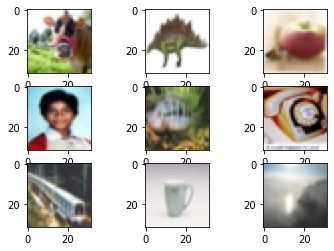

In [39]:
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(trainX[i])
# show the figure
# plt.show()

### CIFAR-100 trainset

In [40]:
# import numpy as np
print(type(trainy))
unique, counts = np.unique(trainy, return_counts=True)
cifar100_train_dic = dict(zip(unique, counts))
print(cifar100_train_dic)

<class 'numpy.ndarray'>
{0: 500, 1: 500, 2: 500, 3: 500, 4: 500, 5: 500, 6: 500, 7: 500, 8: 500, 9: 500, 10: 500, 11: 500, 12: 500, 13: 500, 14: 500, 15: 500, 16: 500, 17: 500, 18: 500, 19: 500, 20: 500, 21: 500, 22: 500, 23: 500, 24: 500, 25: 500, 26: 500, 27: 500, 28: 500, 29: 500, 30: 500, 31: 500, 32: 500, 33: 500, 34: 500, 35: 500, 36: 500, 37: 500, 38: 500, 39: 500, 40: 500, 41: 500, 42: 500, 43: 500, 44: 500, 45: 500, 46: 500, 47: 500, 48: 500, 49: 500, 50: 500, 51: 500, 52: 500, 53: 500, 54: 500, 55: 500, 56: 500, 57: 500, 58: 500, 59: 500, 60: 500, 61: 500, 62: 500, 63: 500, 64: 500, 65: 500, 66: 500, 67: 500, 68: 500, 69: 500, 70: 500, 71: 500, 72: 500, 73: 500, 74: 500, 75: 500, 76: 500, 77: 500, 78: 500, 79: 500, 80: 500, 81: 500, 82: 500, 83: 500, 84: 500, 85: 500, 86: 500, 87: 500, 88: 500, 89: 500, 90: 500, 91: 500, 92: 500, 93: 500, 94: 500, 95: 500, 96: 500, 97: 500, 98: 500, 99: 500}


<BarContainer object of 100 artists>

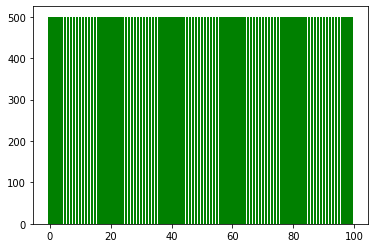

In [41]:
plt.bar(list(cifar100_train_dic.keys()), cifar100_train_dic.values(), color='g')

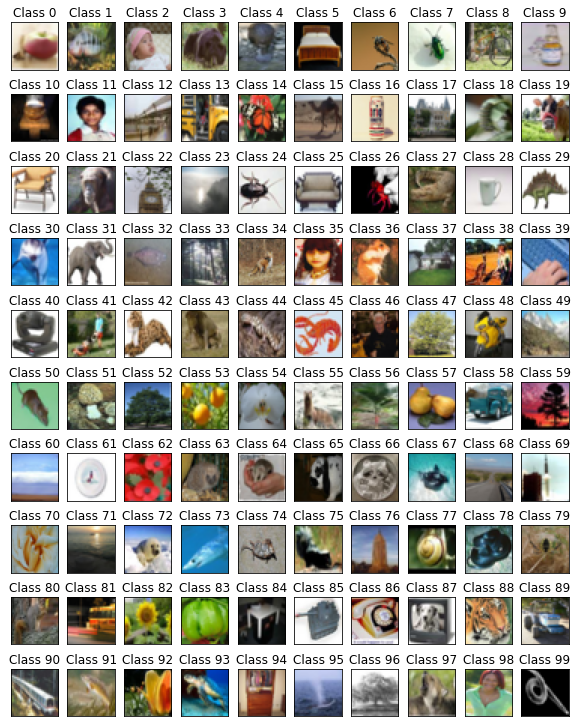

In [42]:
fig = plt.figure(figsize=(10,13))
for i in range(100):
    plt.subplot(10, 10, i+1)
    num0_99 = trainX[trainy[:,0] == i]
    plt.imshow(num0_99[0])  #, cmap='gray') #, interpolation='none')
    plt.title("Class %d" % (i))
    plt.xticks([])
    plt.yticks([])



### [DIY]cifar-100 trainset에서 각 유형이 출현하는 첫 인덱스를 이용해서 대표유형들을 출력하시오.

In [43]:
class_names = ['beaver', 'dolphin', 'otter', 'seal', 'whale', 'aquarium fish', 'flatfish', 'ray', 'shark', 'trout', 'orchids', 'poppies', 'roses', 'sunflowers', 'tulips', 'bottles', 'bowls', 'cans', 'cups', 'plates', 'apples', 'mushrooms', 'oranges', 'pears', 'sweet peppers', 'clock', 'keyboard', 'lamp', 'telephone', 'television', 'bed', 'chair', 'couch', 'table', 'wardrobe', 'bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach', 'bear', 'leopard', 'lion', 'tiger', 'wolf', 'bridge', 'castle', 'house', 'road', 'skyscraper', 'cloud', 'forest', 'mountain', 'plain', 'sea', 'camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo', 'fox', 'porcupine', 'possum', 'raccoon', 'skunk', 'crab', 'lobster', 'snail', 'spider', 'worm', 'baby', 'boy', 'girl', 'man', 'woman', 'crocodile', 'dinosaur', 'lizard', 'snake', 'turtle', 'hamster', 'mouse', 'rabbit', 'shrew', 'squirrel', 'maple', 'oak', 'palm', 'pine', 'willow', 'bicycle', 'bus', 'motorcycle', 'pickup truck', 'train', 'lawn-mower', 'rocket', 'streetcar', 'tank', 'tractor']
class_names.sort() #알파벳 순으로 sorting됨
print(class_names)

['apples', 'aquarium fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottles', 'bowls', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'cans', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cups', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn-mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple', 'motorcycle', 'mountain', 'mouse', 'mushrooms', 'oak', 'oranges', 'orchids', 'otter', 'palm', 'pears', 'pickup truck', 'pine', 'plain', 'plates', 'poppies', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'roses', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflowers', 'sweet peppers', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulips', 'turtle', 'wardrobe', 'whale', 'willow', 'wolf', 

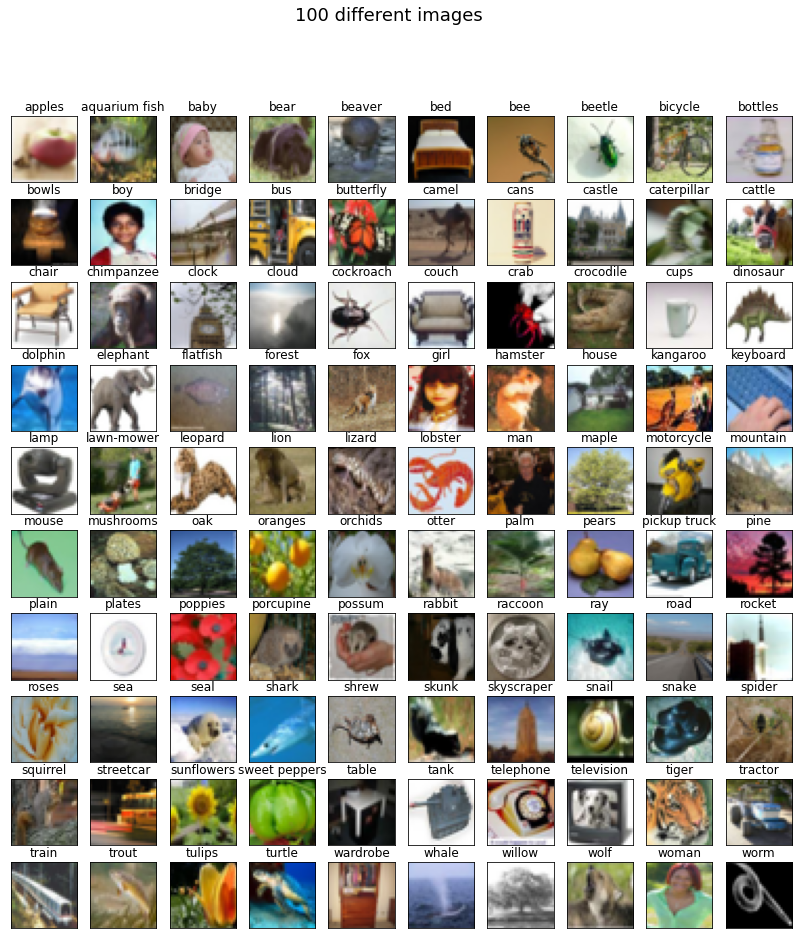

In [44]:
# Your code here!  'computer keyboard' => 'keyboard'
class_names = ['beaver', 'dolphin', 'otter', 'seal', 'whale', 'aquarium fish', 'flatfish', 'ray', 'shark', 'trout', 'orchids', 'poppies', 'roses', 'sunflowers', 'tulips', 'bottles', 'bowls', 'cans', 'cups', 'plates', 'apples', 'mushrooms', 'oranges', 'pears', 'sweet peppers', 'clock', 'keyboard', 'lamp', 'telephone', 'television', 'bed', 'chair', 'couch', 'table', 'wardrobe', 'bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach', 'bear', 'leopard', 'lion', 'tiger', 'wolf', 'bridge', 'castle', 'house', 'road', 'skyscraper', 'cloud', 'forest', 'mountain', 'plain', 'sea', 'camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo', 'fox', 'porcupine', 'possum', 'raccoon', 'skunk', 'crab', 'lobster', 'snail', 'spider', 'worm', 'baby', 'boy', 'girl', 'man', 'woman', 'crocodile', 'dinosaur', 'lizard', 'snake', 'turtle', 'hamster', 'mouse', 'rabbit', 'shrew', 'squirrel', 'maple', 'oak', 'palm', 'pine', 'willow', 'bicycle', 'bus', 'motorcycle', 'pickup truck', 'train', 'lawn-mower', 'rocket', 'streetcar', 'tank', 'tractor']
class_names.sort()  ## 중요!(sort 해야 알파벳순으로 정리된다)
num_100 = np.unique(trainy, return_index=True)[1]
images = trainX[num_100] #서로다른 그림100개를 배열
fig = plt.figure(figsize=(14,15))
for i in range(len(images)):
    # define subplot
    plt.subplot(10,10,1 + i) #, sharey=False)
    # plot raw pixel data
    plt.imshow(images[i])
    plt.title(class_names[i])
    plt.xticks([])
    plt.yticks([])
plt.suptitle("100 different images", fontsize=18)
plt.show()

### CIFAR-100 test set

In [46]:
# import numpy as np
print(type(testy))
unique, counts = np.unique(testy, return_counts=True)
cifar100_test_dic = dict(zip(unique, counts))
cifar100_test_dic


<class 'numpy.ndarray'>


{0: 100,
 1: 100,
 2: 100,
 3: 100,
 4: 100,
 5: 100,
 6: 100,
 7: 100,
 8: 100,
 9: 100,
 10: 100,
 11: 100,
 12: 100,
 13: 100,
 14: 100,
 15: 100,
 16: 100,
 17: 100,
 18: 100,
 19: 100,
 20: 100,
 21: 100,
 22: 100,
 23: 100,
 24: 100,
 25: 100,
 26: 100,
 27: 100,
 28: 100,
 29: 100,
 30: 100,
 31: 100,
 32: 100,
 33: 100,
 34: 100,
 35: 100,
 36: 100,
 37: 100,
 38: 100,
 39: 100,
 40: 100,
 41: 100,
 42: 100,
 43: 100,
 44: 100,
 45: 100,
 46: 100,
 47: 100,
 48: 100,
 49: 100,
 50: 100,
 51: 100,
 52: 100,
 53: 100,
 54: 100,
 55: 100,
 56: 100,
 57: 100,
 58: 100,
 59: 100,
 60: 100,
 61: 100,
 62: 100,
 63: 100,
 64: 100,
 65: 100,
 66: 100,
 67: 100,
 68: 100,
 69: 100,
 70: 100,
 71: 100,
 72: 100,
 73: 100,
 74: 100,
 75: 100,
 76: 100,
 77: 100,
 78: 100,
 79: 100,
 80: 100,
 81: 100,
 82: 100,
 83: 100,
 84: 100,
 85: 100,
 86: 100,
 87: 100,
 88: 100,
 89: 100,
 90: 100,
 91: 100,
 92: 100,
 93: 100,
 94: 100,
 95: 100,
 96: 100,
 97: 100,
 98: 100,
 99: 100}

<BarContainer object of 100 artists>

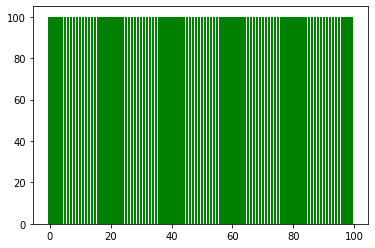

In [47]:
plt.bar(list(cifar100_test_dic.keys()), cifar100_test_dic.values(), color='g')

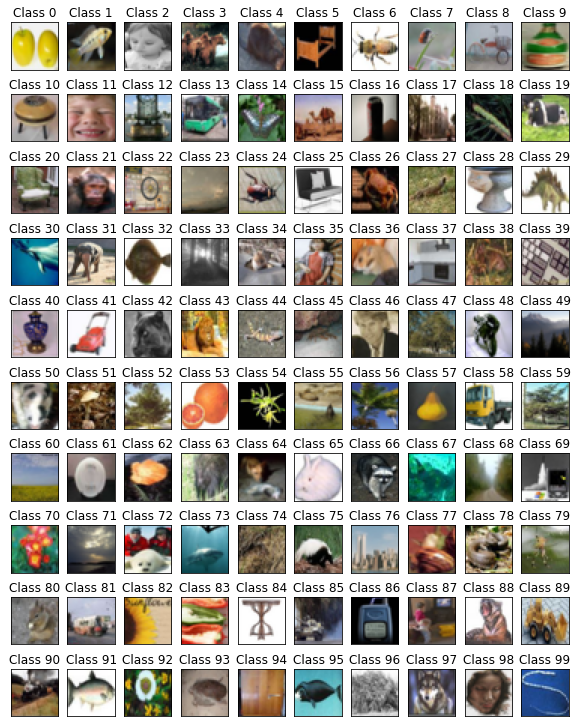

In [48]:
fig = plt.figure(figsize=(10,13))
for i in range(100):
    plt.subplot(10, 10, i+1)
    num0_99 = testX[testy[:,0] == i]
    plt.imshow(num0_99[33]) #, cmap='gray') #, interpolation='none')
    plt.title("Class %d" % (i))
    plt.xticks([])
    plt.yticks([])



### [DIY]cifar-100 testset에서 각 유형이 출현하는 첫 인덱스를 이용해서 대표유형들을 출력하시오.

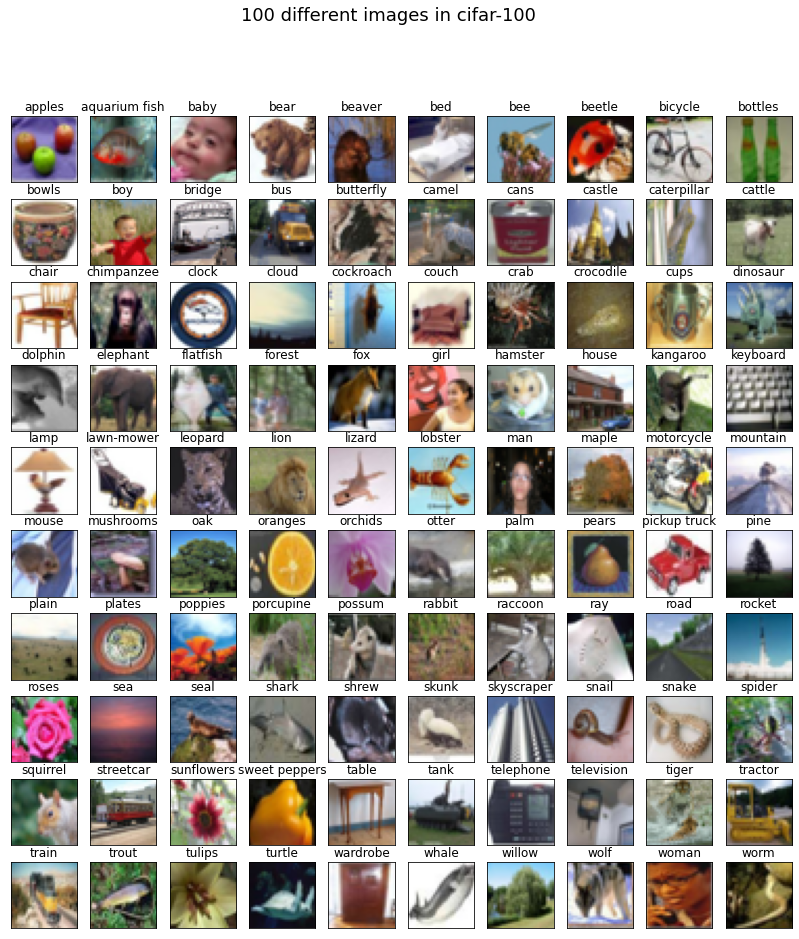

In [50]:
# Your code here!  'computer keyboard' => 'keyboard'
class_names = ['beaver', 'dolphin', 'otter', 'seal', 'whale', 'aquarium fish', 'flatfish', 'ray', 'shark', 'trout', 'orchids', 'poppies', 'roses', 'sunflowers', 'tulips', 'bottles', 'bowls', 'cans', 'cups', 'plates', 'apples', 'mushrooms', 'oranges', 'pears', 'sweet peppers', 'clock', 'keyboard', 'lamp', 'telephone', 'television', 'bed', 'chair', 'couch', 'table', 'wardrobe', 'bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach', 'bear', 'leopard', 'lion', 'tiger', 'wolf', 'bridge', 'castle', 'house', 'road', 'skyscraper', 'cloud', 'forest', 'mountain', 'plain', 'sea', 'camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo', 'fox', 'porcupine', 'possum', 'raccoon', 'skunk', 'crab', 'lobster', 'snail', 'spider', 'worm', 'baby', 'boy', 'girl', 'man', 'woman', 'crocodile', 'dinosaur', 'lizard', 'snake', 'turtle', 'hamster', 'mouse', 'rabbit', 'shrew', 'squirrel', 'maple', 'oak', 'palm', 'pine', 'willow', 'bicycle', 'bus', 'motorcycle', 'pickup truck', 'train', 'lawn-mower', 'rocket', 'streetcar', 'tank', 'tractor']
class_names.sort()  ## 중요!(sort 해야 알파벳순으로 정리된다)
num_100 = np.unique(testy, return_index=True)[1]
images = testX[num_100] #서로다른 그림100개를 배열
fig = plt.figure(figsize=(14,15))
for i in range(len(images)):
    # define subplot
    plt.subplot(10,10,1 + i) #, sharey=False)
    # plot raw pixel data
    plt.imshow(images[i])
    plt.title(class_names[i])
    plt.xticks([])
    plt.yticks([])
plt.suptitle("100 different images in cifar-100", fontsize=18)
plt.show()





---



---



### [DIY] cifar-100 testset에서 class=2,35의 그림들을 모두 출력하시오.

### class=2, 35: 사람 사진 모음
- class=2: baby
-class=35: girl

In [51]:
class_names[2],class_names[35]

('baby', 'girl')

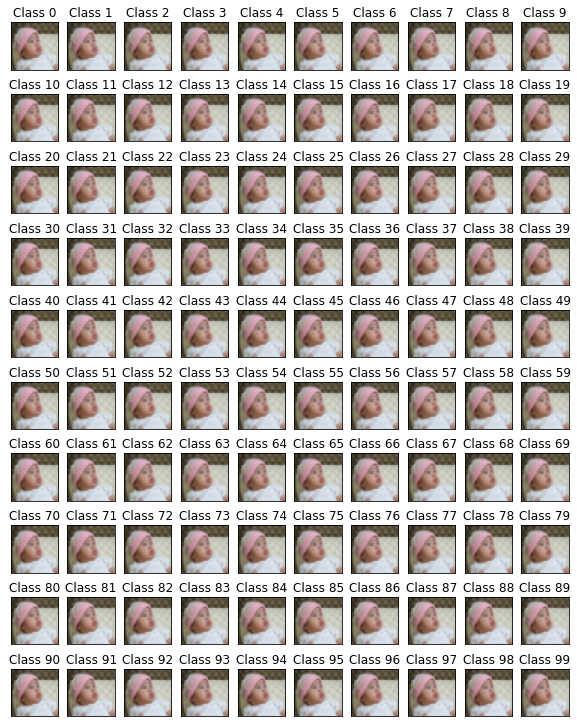

In [53]:
# your code here!


fig = plt.figure(figsize=(10,13))
for i in range(100):
    plt.subplot(10, 10, i+1)
    num0_99 = trainX[trainy[:,0] == 2]
    plt.imshow(num0_99[0])  #, cmap='gray') #, interpolation='none')
    plt.title("Class %d" % (i))
    plt.xticks([])
    plt.yticks([])




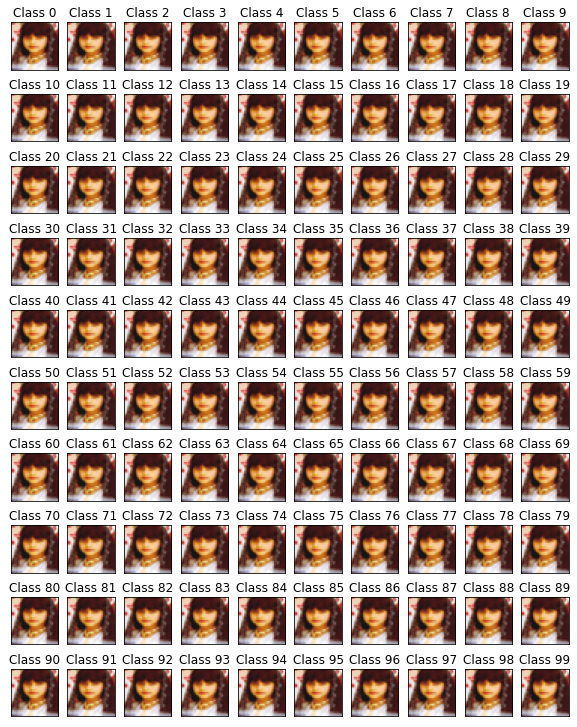

In [54]:
# your code here!


fig = plt.figure(figsize=(10,13))
for i in range(100):
    plt.subplot(10, 10, i+1)
    num0_99 = trainX[trainy[:,0] == 35]
    plt.imshow(num0_99[0])  #, cmap='gray') #, interpolation='none')
    plt.title("Class %d" % (i))
    plt.xticks([])
    plt.yticks([])




---



---



## What is your dataset? Imagine your data!